In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [29]:
bmvsm_years = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
sm_years = bmvsm_years.groupby(['year', 'character']).size().unstack()
sm_years = sm_years.fillna(0)
sy_count = 0
for year in range(0,len(sm_years)):
    if sm_years.iloc[year,0] < sm_years.iloc[year, 1]:
        sy_count+=1
print(sy_count)

12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [31]:
bmvsm_years = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
bm_years = bmvsm_years.groupby(['year', 'character']).size().unstack()
bm_years = bm_years.fillna(0)
by_count = 0
for year in range(0,len(bm_years)):
    if bm_years.iloc[year,0] > bm_years.iloc[year, 1]:
        by_count+=1
print(by_count)

24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [48]:
roles = cast.groupby(['year','type']).size()
num_roles = roles.unstack().fillna(0)
num_roles.head(15)

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,12.0,3.0
1907,5.0,0.0
1908,29.0,13.0
1909,3.0,0.0
1910,44.0,24.0
1911,135.0,63.0


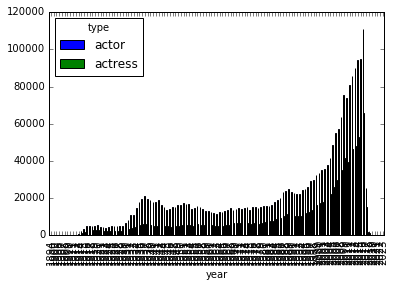

In [56]:
num_roles.plot(kind='bar')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

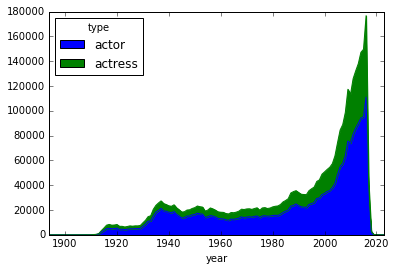

In [57]:
num_roles.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [60]:
num_roles['diff_in_roles'] = num_roles['actor'] - num_roles['actress']

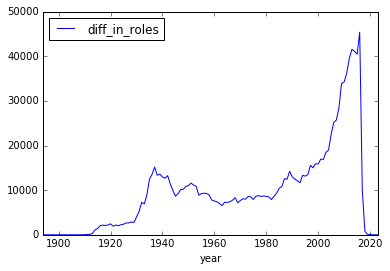

In [68]:
num_roles.plot( y='diff_in_roles', kind = 'line')

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

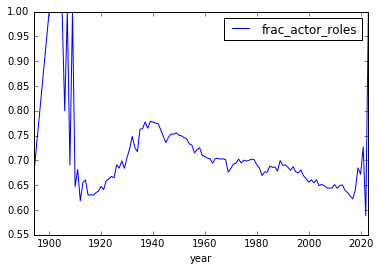

In [75]:
num_roles['total_roles'] = num_roles['actor'] + num_roles['actress']
num_roles['frac_actor_roles'] = num_roles['actor'] / num_roles['total_roles']
num_roles.plot(y='frac_actor_roles', kind = 'line')

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [142]:
supporting_roles = cast[cast.n == 2]
num_n2_roles = supporting_roles.groupby(['year','type']).size().unstack().fillna(0)
num_n2_roles.head()

type,actor,actress
year,,
1906,1.0,1.0
1907,1.0,0.0
1908,2.0,0.0
1910,2.0,2.0
1911,14.0,5.0


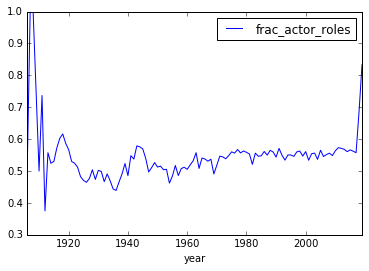

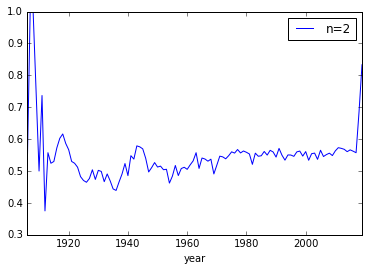

In [144]:
num_n2_roles['frac_actor_roles'] = num_n2_roles['actor'] / (num_n2_roles['actor'] + num_n2_roles['actress'])
num_n2_roles['n=2'] = num_n2_roles['actor'] / (num_n2_roles['actor'] + num_n2_roles['actress'])
frac_actors = num_n2_roles.plot(y='frac_actor_roles', kind = 'line')
n2_frac_actors = num_n2_roles.plot(y='n=2', kind = 'line')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

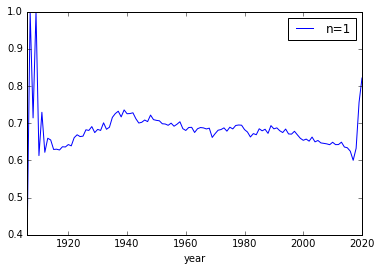

In [146]:
supporting_roles = cast[cast.n >= 1]
roles_pivot_n1 = supporting_roles.groupby(['year','type']).size().unstack().fillna(0)
roles_pivot_n1['n=1'] = roles_pivot_n1['actor'] / (roles_pivot_n1['actor'] + roles_pivot_n1['actress'])
n1_frac_actors = roles_pivot_n1.plot(y='n=1', kind = 'line')

In [153]:
supporting_roles = cast[cast.n == 3]
roles_pivot_n3 = supporting_roles.groupby(['year','type']).size().unstack().fillna(0)
roles_pivot_n3['n=3'] = roles_pivot_n3['actor'] / (roles_pivot_n3['actor'] + roles_pivot_n3['actress'])

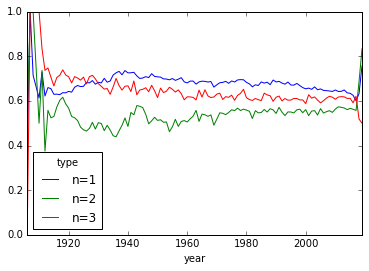

In [155]:
n1and2_pivot = pd.merge(roles_pivot_n1, num_n2_roles, left_index='year', right_index=True)
n123_pivot = pd.merge(n1and2_pivot, roles_pivot_n3, left_index='year', right_index=True)
n123_pivot.plot(y=['n=1','n=2', 'n=3'], kind='line')
